## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## csv table

In [3]:
df = pd.read_csv('Data\\2017_jun_final.csv')

In [4]:
df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [5]:
df.shape

(8704, 25)

In [6]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [7]:
df.isnull().sum()/df.shape[0]

N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Спеціалізація                       0.829389
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Університет                         0.041131
Ще студент                          0.000000
Рівень англійської                  0.000000
Предметна область                   0.025620
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary    

In [8]:
columns_to_drop = df.columns[df.isnull().mean() > 0].to_list()
columns_to_drop.remove('Мова програмування')

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.isnull().sum()/df.shape[0]

N                                   0.000000
Посада                              0.000000
Мова програмування                  0.442325
Загальний досвід роботи             0.000000
Досвід роботи на поточному місці    0.000000
Зарплата на місяць                  0.000000
Зміна зарплати за 12 місяців        0.000000
Місто                               0.000000
Розмір компанії                     0.000000
Тип компанії                        0.000000
Стать                               0.000000
Вік                                 0.000000
Освіта                              0.000000
Ще студент                          0.000000
Рівень англійської                  0.000000
Дата заповнення                     0.000000
User.Agent                          0.000000
exp                                 0.000000
current_job_exp                     0.000000
salary                              0.000000
dtype: float64

In [10]:
df.dropna(inplace=True)
df.shape

(4854, 20)

In [11]:
python_data = df[df['Мова програмування'] == 'Python']
python_data.shape

(207, 20)

In [12]:
grouped_data = df.groupby('Посада')

In [13]:
aggregated_data = grouped_data['Зарплата на місяць'].agg(['min', 'max'])
aggregated_data

,min,max
Посада,,
Data Scientist / Data Analyst,2700,2700
DevOps,7000,7000
ERP / CRM,2000,2000
HTML coder,385,600
Junior Software Engineer,75,2600
Product Manager,3000,3000
Senior Software Engineer,350,9200
Software Engineer,100,7000
System Architect,400,10000


In [14]:
def fill_avg_salary(group):
    return group.mean()

In [15]:
aggregated_data["avg"] = grouped_data['Зарплата на місяць'].apply(fill_avg_salary)
aggregated_data

,min,max,avg
Посада,,,
Data Scientist / Data Analyst,2700,2700,2700.000000
DevOps,7000,7000,7000.000000
ERP / CRM,2000,2000,2000.000000
HTML coder,385,600,457.000000
Junior Software Engineer,75,2600,605.658594
Product Manager,3000,3000,3000.000000
Senior Software Engineer,350,9200,3243.200926
Software Engineer,100,7000,1678.630074
System Architect,400,10000,4387.076923


In [16]:
aggregated_data.describe()

,min,max,avg
count,11.000000,11.000000,11.000000
mean,1728.181818,6009.090909,2907.803502
std,2082.873343,5028.410195,1828.363270
min,75.000000,600.000000,457.000000
25%,367.500000,2650.000000,1839.315037
50%,500.000000,4000.000000,3000.000000
75%,2600.000000,8100.000000,3457.136000
max,7000.000000,18000.000000,7000.000000


In [17]:
aggregated_data.to_csv('Data\\aggregared_2017_jun_final.csv')

## Visualization

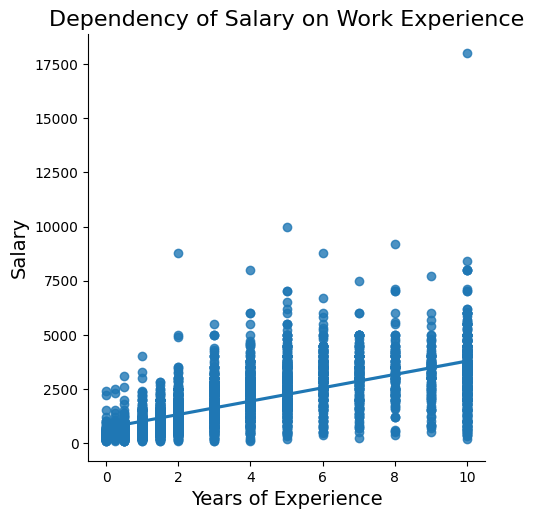

In [18]:
sns.lmplot(x="exp", y="salary", data=df)
plt.title('Dependency of Salary on Work Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.show()

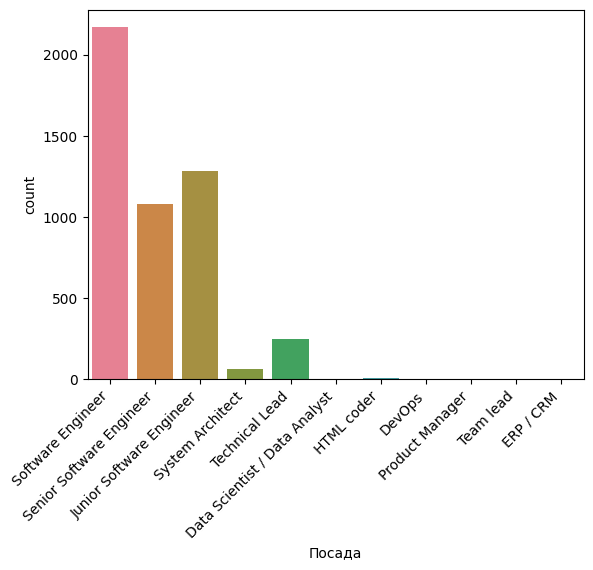

In [19]:
sns.countplot(x="Посада", data=df, hue="Посада")
plt.xticks(rotation = 45, ha='right')
plt.show()

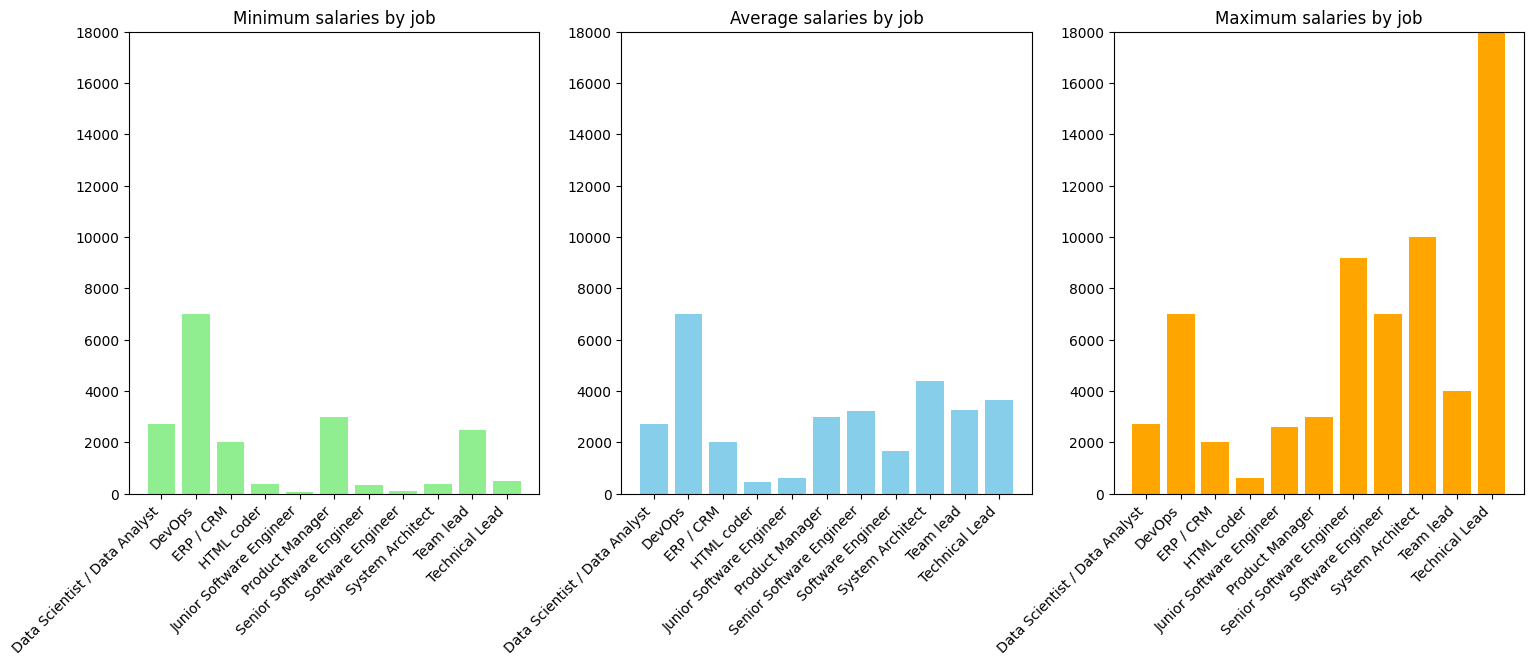

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].bar(aggregated_data.index, aggregated_data['min'], color='lightgreen')
axs[0].set_title('Minimum salaries by job')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim(0, 18000)
plt.sca(axs[0])
plt.xticks(ha='right')


axs[1].bar(aggregated_data.index, aggregated_data['avg'], color='skyblue')
axs[1].set_title('Average salaries by job')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylim(0, 18000)
plt.sca(axs[1])
plt.xticks(ha='right')


axs[2].bar(aggregated_data.index, aggregated_data['max'], color='orange')
axs[2].set_title('Maximum salaries by job')
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_ylim(0, 18000)
plt.sca(axs[2])
plt.xticks(ha='right')

plt.show()